# Group 4 Prediction Task
## Module 3: Data Analytics and Statistical Machine Learning 20/21
## Group members: Alex Carberry, Wendy Jiang, Georgina Robertson, Yuxi You

## Abstract
                
RNA-Seq reveals an unprecedented complexity of the neuroblastoma transcriptome and is suitable for clinical endpoint prediction [ microarray ]

### Experiment Description  

We generated gene expression profiles from 498 primary neuroblastomas using RNA-Seq and microarrays. We sought to systematically evaluate the capability of RNA deep-sequencing (RNA-Seq)-based classification for clinical endpoint prediction in comparison to microarray-based ones. The neuroblastoma cohort was randomly divided into training and validation sets (**Please note:** <em>in the following we refer to this validation set as test set</em>), and 360 predictive models on six clinical endpoints were generated and evaluated. While prediction performances did not differ considerably between the two technical platforms, the RNA-Seq data processing pipelines, or feature levels (i.e., gene, transcript, and exon junction levels), RNA-Seq models based on the AceView database performed best on most endpoints. Collectively, our study reveals an unprecedented complexity of the neuroblastoma transcriptome, and provides guidelines for the development of gene expression-based predictive classifiers using high-throughput technologies.  Sample clinical characteristics definitions:  

* sex: 
    <ul>
    <li>M = male</li>
    <li>F = female</li>
    </ul>
    
* age at diagnosis: The age in days at diagnosis 
    <ul>
    <li>integer</li>
    </ul>

* high risk: Clinically considered as high-risk neuroblastoma
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>


* INSS stage: Disease stage according to International Neuroblastoma Staging System ([INSS](https://www.cancer.org/cancer/neuroblastoma/detection-diagnosis-staging/staging.html)) 
    <ul>
    <li>1</li>
    <li>2</li>
    <li>3</li>
    <li>4</li>
    <li>4S</li>
    </ul>


* progression: Occurrence of a tumor progression event
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>



* death from disease: Occurrence of death from the disease (yes=1; no=0) 
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>





Gene expression of 498 neuroblastoma samples was quantified by RNA sequencing as well as by microarray analyses in order to understand the neuroblastoma transcriptome and predict clinical endpoints. 

_________________________________________________________________________________________________________
## Preparation
_________________________________________________________________________________________________________

### Package installation

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# for saving
import os,os.path

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from matplotlib import pyplot
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

### File and data preparation

In [7]:
# Set directory and filenames
data_dir = '..{}data'.format(os.path.sep) ###### YUXI #######
#data_dir = '~/Documents/MSc/module 3/grp/data/'.format(os.path.sep) #### GEORGINA ######

fn_fpkm             = 'log2FPKM.tsv'
fn_patient_info     = 'patientInfo.tsv'
fn_prop_intensities = 'allProbIntensities.tsv'

In [8]:
# Load the RNA-seq data
df_fpkm = pd.read_csv('{}/{}'.format(data_dir,fn_fpkm),sep='\t',).rename({'00gene_id':'gene_id'},axis=1)
df_fpkm = df_fpkm.set_index(['gene_id'])
df_fpkm.columns.name = 'ID'

In [9]:
# Inspect the RNA-seq data
df_fpkm.head()

ID,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,NB010,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
gene_id,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0.834381,0.743094,0.909414,0.795775,0.905540,0.869154,1.811352,0.599240,0.981855,1.066399,...,0.997977,1.003559,0.842437,1.057873,0.805515,0.491331,0.868249,0.911379,0.660139,1.152988
A1BG,1.910053,0.941996,1.950857,1.989477,1.942946,1.927608,1.617745,2.161291,1.436439,2.159797,...,2.336929,2.836360,1.205317,2.439868,1.649027,1.451425,1.493852,1.641241,1.994978,1.289534
A1BG-AS1,1.453191,0.640614,1.156765,1.525277,1.365043,0.899212,1.304178,1.189205,0.771248,1.114787,...,1.182908,1.367371,0.643751,1.096815,0.925425,0.933275,1.208723,0.904511,1.529221,1.102866
A1CF,0.005102,0.005902,0.005192,0.000000,0.025347,0.005682,0.000000,0.000000,0.021880,0.000000,...,0.024298,0.007295,0.000000,0.006678,0.005746,0.004998,0.004853,0.000000,0.022780,0.018720
A2LD1,0.580151,0.738233,0.927667,0.936497,0.924853,0.739038,1.018705,0.546324,0.666877,0.865850,...,0.673627,1.401265,0.837443,0.939849,0.743496,0.957837,0.812093,0.488748,1.068072,0.782887


In [10]:
# Load the microarray data
df_prop_intensities = pd.read_csv('{}/{}'.format(data_dir,fn_prop_intensities),sep='\t').set_index(['Reporter.Identifier'])
df_prop_intensities.columns.name = 'ID'

df_prop_intensities.head()

ID,GeneSymbols,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
Reporter.Identifier,,,,,,,,,,,,,,,,,,,,,
28913,NaN,14.99,14.94,12.48,14.63,11.89,15.09,13.07,12.00,11.70,...,13.62,13.03,14.98,13.36,13.90,13.00,13.79,14.70,14.03,12.31
27262,NaN,9.20,10.41,9.27,8.83,7.97,10.33,9.62,8.72,9.36,...,6.26,5.93,6.97,5.99,7.62,7.76,8.56,7.74,7.57,7.08
3180,NaN,5.06,5.26,6.45,2.89,2.00,4.80,3.05,6.39,6.43,...,0.93,0.58,1.26,1.38,3.49,2.07,2.26,2.29,2.63,2.54
41426,MBL1P,7.45,8.68,6.30,7.30,6.26,7.50,7.43,6.98,8.02,...,5.35,5.57,5.51,6.30,6.60,6.38,7.49,6.77,8.13,7.11
37033,NaN,6.74,6.63,6.75,6.20,6.57,6.01,6.78,4.80,5.15,...,4.58,4.61,3.54,4.55,4.20,7.16,7.07,5.07,6.28,6.34


In [11]:
# Load the patient factors, including the potential endpoints
df_patient_info = pd.read_csv('{}/{}'.format(data_dir,fn_patient_info),sep='\t').set_index('ID')
df_patient_info.columns.name = 'FactorValues'


In [12]:
# Inspect patient data
df_patient_info.head()

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB498,female,530,NaN,NaN,NaN,NaN
NB497,female,379,0.0,0.0,1,0.0
NB496,male,132,NaN,NaN,NaN,NaN
NB495,male,163,0.0,0.0,1,0.0
NB494,male,56,NaN,NaN,NaN,NaN


### Divide patient data into train and set sets

In [13]:
# Train on complete observations
df_patient_info_train  = df_patient_info[df_patient_info['FactorValue..death.from.disease.'].notna()]
# Test on obs. with missing values
df_patient_info_test   = df_patient_info[df_patient_info['FactorValue..death.from.disease.'].isna()]

In [14]:
# Inspect
df_patient_info_train.head()

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB497,female,379,0.0,0.0,1,0.0
NB495,male,163,0.0,0.0,1,0.0
NB493,male,190,0.0,0.0,1,0.0
NB491,male,2326,0.0,1.0,4,1.0
NB489,female,865,0.0,1.0,4,0.0


In [15]:
# Inspect
df_patient_info_test.head()

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB498,female,530,NaN,NaN,NaN,NaN
NB496,male,132,NaN,NaN,NaN,NaN
NB494,male,56,NaN,NaN,NaN,NaN
NB492,male,947,NaN,NaN,NaN,NaN
NB490,female,1759,NaN,NaN,NaN,NaN


_________________________________________________________________________________________________________
# Analysis
_________________________________________________________________________________________________________

I encountered problems working with the RNA-seq data, and cosequently only used the microarray set.

## Further preparation of data

To limit the amount of potential noise in the data, I decided to reduce the number of variables significantly. Given that the dataset includes probes for over 44,000 genes, transcripts and exon-junction levels I decided to look at only genes that were strongly implicated in the pathology of Neuroblastoma. <br><br>
Sources: From genecards website (and another one I forgot about but will find)

In [16]:
# create the list
gene_list = ["KIFB1B2","MYCN", "NF1", "LET7", "TERT", "PHOX2B", "ALK", "ARTX", "CD798", "SOX9", "RPTOR", "TP53", "PRPN11", "NRAS", "PIK3CA", "FGFR1", "BDNF", "ASCL1", "RET", "MSH2"]
# find them in the microarray dataset
genes_of_interest = df_prop_intensities.loc[df_prop_intensities["GeneSymbols"].isin(gene_list)]

In [17]:
genes_of_interest.head(20)

ID,GeneSymbols,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
Reporter.Identifier,,,,,,,,,,,,,,,,,,,,,
36700,TERT,9.28,9.76,9.33,9.29,8.89,9.39,9.12,8.30,9.43,...,9.04,7.95,10.07,8.59,8.44,8.72,9.10,8.84,8.40,8.50
35332,NF1,8.62,6.44,2.54,5.61,4.41,4.15,6.94,2.96,4.15,...,3.50,5.43,4.52,4.90,4.86,5.28,6.06,4.15,6.62,7.09
40594,BDNF,10.67,11.39,10.50,11.28,9.82,10.14,10.46,10.75,10.80,...,9.68,8.60,10.33,9.27,11.65,10.91,11.55,11.40,11.84,10.88
813,TP53,5.65,5.06,5.93,2.96,2.10,4.49,3.10,6.12,6.12,...,3.32,0.58,1.38,2.07,2.58,3.79,2.41,3.64,3.28,3.81
811,TP53,11.42,11.27,10.31,11.00,11.01,10.94,11.33,10.98,10.58,...,10.85,11.86,11.14,10.45,10.13,10.66,10.80,10.30,10.62,10.88
38444,TERT,4.67,8.90,6.43,5.72,5.21,7.69,7.72,9.12,8.21,...,7.35,8.49,11.68,5.61,11.59,5.42,5.31,6.49,6.18,5.27
44248,TERT,9.00,10.31,9.29,8.88,8.83,10.10,10.35,9.24,10.11,...,7.26,8.08,7.95,7.27,8.41,8.25,9.29,9.10,8.89,8.54
44494,RET,13.26,14.40,12.51,13.43,12.48,14.10,13.01,12.32,12.39,...,12.43,12.60,13.39,12.62,14.39,13.89,14.22,14.08,14.36,13.47
34963,MSH2,11.20,10.69,8.28,8.48,6.74,11.49,10.06,7.70,9.94,...,5.00,3.55,4.80,5.43,5.93,5.00,6.75,6.20,6.69,9.71


Notice that not all genes in the gene_list are present in the sample. it could be that there was a different naming convention used for some of these, or they are just not there at all

In [18]:
# Transpose this gene data so that is is oriented the same way was the patient data
tp_gene_of_i = genes_of_interest.transpose()

In [19]:
# Merge the selected gene data onto both test and train sets
train_on_genes = df_patient_info_train.join(tp_gene_of_i, on="ID")
test_on_genes = df_patient_info_test.join(tp_gene_of_i, on="ID")

In [20]:
# Examine one of the newly merged datasets
test_on_genes.head(10)

,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.,36700,35332,40594,813,...,44494,34963,42490,36855,42910,34175,44328,36747,43552,38595
ID,,,,,,,,,,,,,,,,,,,,,
NB498,female,530,NaN,NaN,NaN,NaN,8.5,7.09,10.88,3.81,...,13.47,9.71,10.97,10.48,7.42,9,7.66,11.97,11.87,8.6
NB496,male,132,NaN,NaN,NaN,NaN,8.84,4.15,11.4,3.64,...,14.08,6.2,11.42,10.68,8.15,8.61,8.54,12.46,12.13,9.05
NB494,male,56,NaN,NaN,NaN,NaN,8.72,5.28,10.91,3.79,...,13.89,5,10.82,10.09,7.42,8.75,8.43,12.88,13.44,8.7
NB492,male,947,NaN,NaN,NaN,NaN,8.59,4.9,9.27,2.07,...,12.62,5.43,10.98,10.23,5.46,7.83,8.8,12.79,11.7,9.32
NB490,female,1759,NaN,NaN,NaN,NaN,7.95,5.43,8.6,0.58,...,12.6,3.55,9.21,10.14,6.39,8.36,7.34,12.82,11.09,9.16
NB488,female,212,NaN,NaN,NaN,NaN,8.32,4.43,9.57,1.58,...,12.7,3.99,9.32,10.13,4.72,7.84,5.09,11.95,11.14,8.35
NB486,male,478,NaN,NaN,NaN,NaN,9.19,5.28,11.12,2.61,...,14.11,5.08,11.26,10.58,6.72,6.94,8.41,13.95,13.38,9.14
NB484,female,1546,NaN,NaN,NaN,NaN,7.74,3.78,9.44,2,...,11.95,3.64,9.19,8.99,4.6,6.08,6.97,12.56,11.2,7.51
NB482,male,465,NaN,NaN,NaN,NaN,9.36,7.4,11.35,2.68,...,14.19,4.71,11.23,10.62,7.23,9.12,8.32,13.26,13.08,9.03


## Missing Death Data
### Step-by-step implementation of predictive model

In [49]:
# define the model
RandomForest_model = RandomForestClassifier(n_estimators=5, random_state=10)

Different model parameters were chosen initially as:<br>
* death_pred_model = RandomForestClassifier(n_estimators=17, random_state=30)

These were changed due to insight from Yuxi, who will explain them shortly.

In [50]:
## For the training set
# define dependent variable
Y_train = train_on_genes["FactorValue..death.from.disease."]
# define indy variables 
X_train = train_on_genes.drop(train_on_genes.iloc[:,0:6],axis=1)

In [51]:
## For the test set
# define dependent variable
Y_test = test_on_genes["FactorValue..death.from.disease."]
# define indy variables 
X_test = test_on_genes.drop(test_on_genes.iloc[:,0:6],axis=1)

In [52]:
# fit the model to the training data
RandomForest_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=5, random_state=10)

In [53]:
# predict the Y on the train set (Death)
prediction_Y_train = RandomForest_model.predict(X_train)

In [54]:
# use the model on the test set to predict values in deaths
prediction_test = RandomForest_model.predict(X_test)

##########################################################################
# make a copy of the test set for altering
predicted_test_df= test_on_genes
predicted_test_df.head()
##########################################################################

# Insert the predicted values into the copied table
predicted_test_df["FactorValue..death.from.disease."]= prediction_test
predicted_test_df.head()

,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.,36700,35332,40594,813,...,44494,34963,42490,36855,42910,34175,44328,36747,43552,38595
ID,,,,,,,,,,,,,,,,,,,,,
NB498,female,530,0.0,0.0,1,0.0,8.5,7.09,10.88,3.81,...,13.47,9.71,10.97,10.48,7.42,9,7.66,11.97,11.87,8.6
NB496,male,132,0.0,0.0,4S,1.0,8.84,4.15,11.4,3.64,...,14.08,6.2,11.42,10.68,8.15,8.61,8.54,12.46,12.13,9.05
NB494,male,56,0.0,0.0,1,0.0,8.72,5.28,10.91,3.79,...,13.89,5,10.82,10.09,7.42,8.75,8.43,12.88,13.44,8.7
NB492,male,947,1.0,1.0,4,0.0,8.59,4.9,9.27,2.07,...,12.62,5.43,10.98,10.23,5.46,7.83,8.8,12.79,11.7,9.32
NB490,female,1759,1.0,1.0,4,0.0,7.95,5.43,8.6,0.58,...,12.6,3.55,9.21,10.14,6.39,8.36,7.34,12.82,11.09,9.16


### Performance measures

## Yuxi

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(Y_train, prediction_Y_train))

[[196   2]
 [  3  48]]


In [56]:
#define a function to calculate performance measures
def get_results(confusion_matrix):
    res = {}

    # TP
    res['TP'] = confusion_matrix[0,0]
    # FN
    res['FN'] = confusion_matrix[0,1]
    # TN
    res['TN'] = confusion_matrix[1,1]
    # FP
    res['FP'] = confusion_matrix[1,0]

    res['accuracy']   = (res['TP']+res['TN'])/(res['TP']+res['FN']+res['TN']+res['FP'])
    res['precision']  = (res['TP'])          /(res['TP']+res['FP'])
    res['recall']     = (res['TP'])          /(res['TP']+res['FN'])
    res['error rate'] = 1-res['accuracy']
    res['f1']         = 2 * (res['precision'] * res['recall']) / (res['precision'] + res['recall'])
    res['tpr']        = res['recall']
    res['fpr']        = (res['FP'])          /(res['FP']+res['TN'])
    
    return res

In [57]:
# calculate performance measures
death_confusion_matrix = confusion_matrix(Y_train, prediction_Y_train)
get_results(death_confusion_matrix)

{'TP': 196,
 'FN': 2,
 'TN': 48,
 'FP': 3,
 'accuracy': 0.9799196787148594,
 'precision': 0.9849246231155779,
 'recall': 0.98989898989899,
 'error rate': 0.02008032128514059,
 'f1': 0.9874055415617129,
 'tpr': 0.98989898989899,
 'fpr': 0.058823529411764705}

<Figure size 432x288 with 0 Axes>

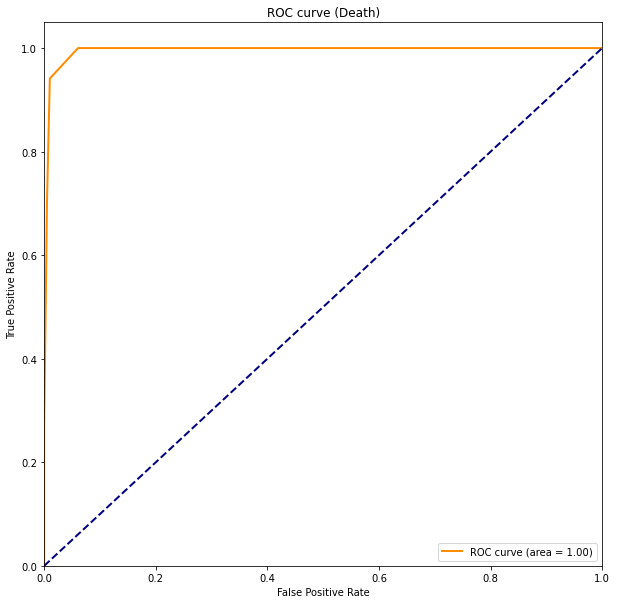

In [58]:
from sklearn.metrics import roc_curve, auc

# predicted probabilities for each class    
prediction_train_probs = RandomForest_model.predict_proba(X_train)[:, 1] 

# compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(Y_train,prediction_train_probs) 
roc_auc = auc(fpr,tpr) 

# plot the ROC curve
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (Death)')
plt.legend(loc="lower right")
plt.show()

### The Genes: 
### KIFB1B2 , Score: 0.08102
### NF1 , Score: 0.06677
### LET7 , Score: 0.06932
### ARTX , Score: 0.07254
### PRPN11 , Score: 0.06839
### FGFR1 , Score: 0.09116
### BDNF , Score: 0.10179
### Contributed 55.1% to our death prediction model

In [59]:
####################################################################################
# define the model
death_pred_model = RandomForestClassifier(n_estimators=17, random_state=30)
####################################################################################
# would you like to try adding a little more control over the model design?
#X_train, Y_train = make_classification(n_samples=500, n_features=17, n_informative=5, n_redundant=5, random_state=1)
# define the model
#death_pred_model = RandomForestClassifier(n_estimators=17, random_state=30)
# fit the model to the training data

death_pred_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=17, random_state=30)

GENE: KIFB1B2 , Score: 0.08102
GENE: MYCN , Score: 0.04753
GENE: NF1 , Score: 0.06677
GENE: LET7 , Score: 0.06932
GENE: TERT , Score: 0.05933
GENE: PHOX2B , Score: 0.05012
GENE: ALK , Score: 0.04541
GENE: ARTX , Score: 0.07254
GENE: CD798 , Score: 0.03903
GENE: SOX9 , Score: 0.05428
GENE: RPTOR , Score: 0.03703
GENE: TP53 , Score: 0.03345
GENE: PRPN11 , Score: 0.06839
GENE: NRAS , Score: 0.04432
GENE: PIK3CA , Score: 0.03851
GENE: FGFR1 , Score: 0.09116
GENE: BDNF , Score: 0.10179


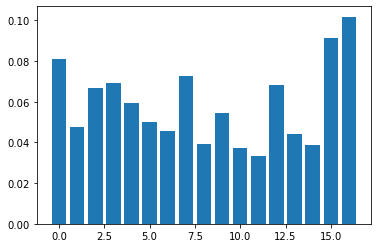

In [85]:
#Check feature importance and plot
# get importance this would allow us to adjust samples features, n_informative and redundant to
#test accuracy of the modesls we can also begin to identify the most influential features
death_pred_model_importance = death_pred_model.feature_importances_
# print the importance of features
for b,m in enumerate(death_pred_model_importance):
	print('GENE:', gene_list[b] , ', Score: %.5f' % (m))

# plot feature importance
pyplot.bar([x for x in range(len(death_pred_model_importance))], death_pred_model_importance)
pyplot.show()

________________________________________________________________________________________________

## Missing Risk Data

In [61]:
# define dependent variable
Y_train2 = train_on_genes["FactorValue..high.risk."]
# define indy variables 
X_train2 = train_on_genes.drop(train_on_genes.iloc[:,0:6],axis=1)

## For the test set
# define dependent variable
Y_test2 = test_on_genes["FactorValue..high.risk."]
# define indy variables 
X_test2 = test_on_genes.drop(test_on_genes.iloc[:,0:6],axis=1)

# fit the model to the training data
RandomForest_model.fit(X_train2, Y_train2)

RandomForestClassifier(n_estimators=5, random_state=10)

In [62]:
# use the model on the test set to predict values in risk
prediction_test2 = RandomForest_model.predict(X_test2)

# Insert the predicted values into the copied table
predicted_test_df["FactorValue..high.risk."]= prediction_test2
predicted_test_df.head()

,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.,36700,35332,40594,813,...,44494,34963,42490,36855,42910,34175,44328,36747,43552,38595
ID,,,,,,,,,,,,,,,,,,,,,
NB498,female,530,0.0,0.0,1,0.0,8.5,7.09,10.88,3.81,...,13.47,9.71,10.97,10.48,7.42,9,7.66,11.97,11.87,8.6
NB496,male,132,0.0,0.0,4S,1.0,8.84,4.15,11.4,3.64,...,14.08,6.2,11.42,10.68,8.15,8.61,8.54,12.46,12.13,9.05
NB494,male,56,0.0,0.0,1,0.0,8.72,5.28,10.91,3.79,...,13.89,5,10.82,10.09,7.42,8.75,8.43,12.88,13.44,8.7
NB492,male,947,1.0,1.0,4,0.0,8.59,4.9,9.27,2.07,...,12.62,5.43,10.98,10.23,5.46,7.83,8.8,12.79,11.7,9.32
NB490,female,1759,1.0,1.0,4,0.0,7.95,5.43,8.6,0.58,...,12.6,3.55,9.21,10.14,6.39,8.36,7.34,12.82,11.09,9.16


### Performance measures

In [63]:
# predict the Y on the train set (Risk)
prediction_Y_train2 = RandomForest_model.predict(X_train2)
print(confusion_matrix(Y_train2, prediction_Y_train2))
# calculate performance measures
risk_confusion_matrix = confusion_matrix(Y_train2, prediction_Y_train2)
get_results(risk_confusion_matrix)

[[161   2]
 [  2  84]]


{'TP': 161,
 'FN': 2,
 'TN': 84,
 'FP': 2,
 'accuracy': 0.9839357429718876,
 'precision': 0.9877300613496932,
 'recall': 0.9877300613496932,
 'error rate': 0.016064257028112428,
 'f1': 0.9877300613496932,
 'tpr': 0.9877300613496932,
 'fpr': 0.023255813953488372}

<Figure size 432x288 with 0 Axes>

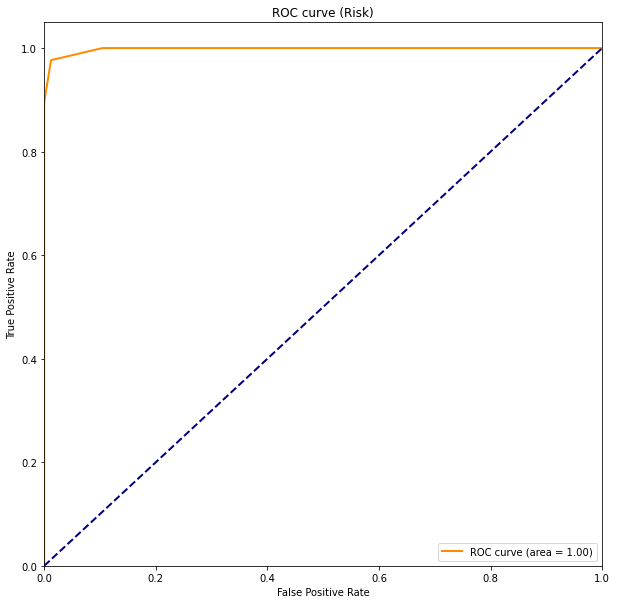

In [64]:
# predicted probabilities for each class    
prediction_train2_probs = RandomForest_model.predict_proba(X_train2)[:, 1] 

# compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(Y_train2,prediction_train2_probs) 
roc_auc = auc(fpr,tpr) 

# plot the ROC curve
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (Risk)')
plt.legend(loc="lower right")
plt.show()

### The Genes: 
### KIFB1B2 , Score: 0.07751
### ARTX , Score: 0.24082
### RPTOR , Score: 0.06268
### FGFR1  Score: 0.16015
### BDNF , Score: 0.09223
### Contributed 63% to our prediction model

GENE: KIFB1B2 , Score: 0.07751
GENE: MYCN , Score: 0.03438
GENE: NF1 , Score: 0.04367
GENE: LET7 , Score: 0.03927
GENE: TERT , Score: 0.04136
GENE: PHOX2B , Score: 0.01322
GENE: ALK , Score: 0.04296
GENE: ARTX , Score: 0.24082
GENE: CD798 , Score: 0.03907
GENE: SOX9 , Score: 0.01173
GENE: RPTOR , Score: 0.06268
GENE: TP53 , Score: 0.03660
GENE: PRPN11 , Score: 0.02198
GENE: NRAS , Score: 0.02312
GENE: PIK3CA , Score: 0.01923
GENE: FGFR1 , Score: 0.16015
GENE: BDNF , Score: 0.09223


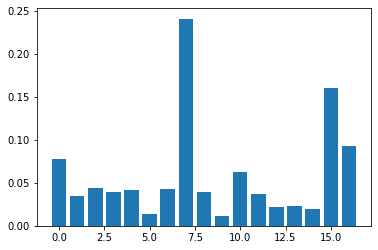

In [86]:
#Check feature importance and plot
# get importance this would allow us to adjust samples features, n_informative and redundant to
#test accuracy of the modesls we can also begin to identify the most influential features
risk_pred_model_importance = RandomForest_model.feature_importances_
# print the importance of features
for b,m in enumerate(risk_pred_model_importance):
	print('GENE:', gene_list[b] , ', Score: %.5f' % (m))
# plot feature importance
pyplot.bar([x for x in range(len(risk_pred_model_importance))], risk_pred_model_importance)
pyplot.show()

____________________________________________________________________________________________________

## Missing Progression Data

In [38]:
# define dependent variable
Y_train3 = train_on_genes["FactorValue..progression."]
# define indy variables 
X_train3 = train_on_genes.drop(train_on_genes.iloc[:,0:6],axis=1)

## For the test set
# define dependent variable
Y_test3 = test_on_genes["FactorValue..progression."]
# define indy variables 
X_test3 = test_on_genes.drop(test_on_genes.iloc[:,0:6],axis=1)

# fit the model to the training data
RandomForest_model.fit(X_train3, Y_train3)

RandomForestClassifier(n_estimators=5, random_state=10)

In [39]:
# use the model on the test set to predict values in progression
prediction_test3 = RandomForest_model.predict(X_test3)

# Insert the predicted values into the copied table
predicted_test_df["FactorValue..progression."]= prediction_test3
predicted_test_df.head()

,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.,36700,35332,40594,813,...,44494,34963,42490,36855,42910,34175,44328,36747,43552,38595
ID,,,,,,,,,,,,,,,,,,,,,
NB498,female,530,0.0,0.0,NaN,0.0,8.5,7.09,10.88,3.81,...,13.47,9.71,10.97,10.48,7.42,9,7.66,11.97,11.87,8.6
NB496,male,132,0.0,0.0,NaN,1.0,8.84,4.15,11.4,3.64,...,14.08,6.2,11.42,10.68,8.15,8.61,8.54,12.46,12.13,9.05
NB494,male,56,0.0,0.0,NaN,0.0,8.72,5.28,10.91,3.79,...,13.89,5,10.82,10.09,7.42,8.75,8.43,12.88,13.44,8.7
NB492,male,947,1.0,1.0,NaN,0.0,8.59,4.9,9.27,2.07,...,12.62,5.43,10.98,10.23,5.46,7.83,8.8,12.79,11.7,9.32
NB490,female,1759,1.0,1.0,NaN,0.0,7.95,5.43,8.6,0.58,...,12.6,3.55,9.21,10.14,6.39,8.36,7.34,12.82,11.09,9.16


### Performance measures

In [40]:
# predict the Y on the train set (Progression)
prediction_Y_train3 = RandomForest_model.predict(X_train3)
print(confusion_matrix(Y_train3, prediction_Y_train3))
# calculate performance measures
progression_confusion_matrix = confusion_matrix(Y_train3, prediction_Y_train3)
get_results(progression_confusion_matrix)

[[152   8]
 [  6  83]]


{'TP': 152,
 'FN': 8,
 'TN': 83,
 'FP': 6,
 'accuracy': 0.9437751004016064,
 'precision': 0.9620253164556962,
 'recall': 0.95,
 'error rate': 0.05622489959839361,
 'f1': 0.9559748427672956,
 'tpr': 0.95,
 'fpr': 0.06741573033707865}

<Figure size 432x288 with 0 Axes>

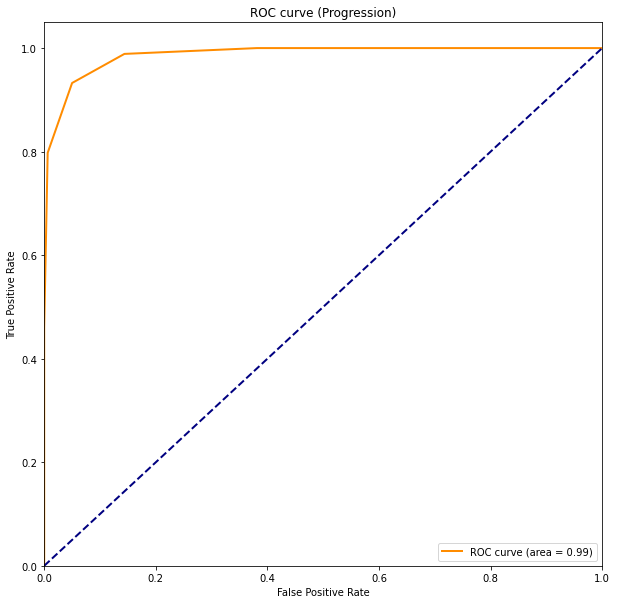

In [41]:
# predicted probabilities for each class    
prediction_train3_probs = RandomForest_model.predict_proba(X_train3)[:, 1] 

# compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(Y_train3,prediction_train3_probs) 
roc_auc = auc(fpr,tpr) 

# plot the ROC curve
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (Progression)')
plt.legend(loc="lower right")
plt.show()

### The Genes - GENE: 
### KIFB1B2 , Score: 0.07751, 
### ARTX , Score: 0.24082, 
### FGFR1 , Score: 0.16015, 
### BDNF , Score: 0.09223
### contributed 57% to our prediction model

GENE: KIFB1B2 , Score: 0.07751
GENE: MYCN , Score: 0.03438
GENE: NF1 , Score: 0.04367
GENE: LET7 , Score: 0.03927
GENE: TERT , Score: 0.04136
GENE: PHOX2B , Score: 0.01322
GENE: ALK , Score: 0.04296
GENE: ARTX , Score: 0.24082
GENE: CD798 , Score: 0.03907
GENE: SOX9 , Score: 0.01173
GENE: RPTOR , Score: 0.06268
GENE: TP53 , Score: 0.03660
GENE: PRPN11 , Score: 0.02198
GENE: NRAS , Score: 0.02312
GENE: PIK3CA , Score: 0.01923
GENE: FGFR1 , Score: 0.16015
GENE: BDNF , Score: 0.09223


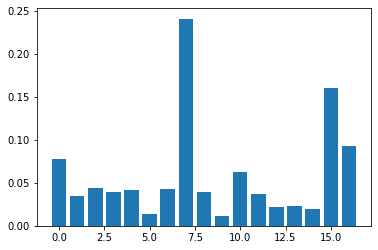

In [88]:
#Check feature importance and plot
# get importance this would allow us to adjust samples features, n_informative and redundant to
#test accuracy of the modesls we can also begin to identify the most influential features
progression_pred_model_importance = RandomForest_model.feature_importances_
# print the importance of features
for b,m in enumerate(progression_pred_model_importance):
	print('GENE:', gene_list[b] , ', Score: %.5f' % (m))
# plot feature importance
pyplot.bar([x for x in range(len(progression_pred_model_importance))], progression_pred_model_importance)
pyplot.show()

____________________________________________________________________________________________________

## Missing INSS Data
THIS IS PROBABLY NOT A GOOD MODEL, SEE BELOW

In [43]:
# set training data
Y_train4 = train_on_genes["FactorValue..inss.stage."]
X_train4 = train_on_genes.drop(train_on_genes.iloc[:,0:6],axis=1)
# set testing data
Y_test4 = test_on_genes["FactorValue..inss.stage."]
X_test4 = test_on_genes.drop(test_on_genes.iloc[:,0:6],axis=1)
# fit the model to the training data
RandomForest_model.fit(X_train4, Y_train4)

RandomForestClassifier(n_estimators=5, random_state=10)

In [44]:
# use the model on the test set to predict values in deaths
prediction_test4 = RandomForest_model.predict(X_test4)
# Insert the predicted values into the copied table
predicted_test_df["FactorValue..inss.stage."]= prediction_test4
predicted_test_df

,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.,36700,35332,40594,813,...,44494,34963,42490,36855,42910,34175,44328,36747,43552,38595
ID,,,,,,,,,,,,,,,,,,,,,
NB498,female,530,0.0,0.0,4,0.0,8.5,7.09,10.88,3.81,...,13.47,9.71,10.97,10.48,7.42,9,7.66,11.97,11.87,8.6
NB496,male,132,0.0,0.0,4,1.0,8.84,4.15,11.4,3.64,...,14.08,6.2,11.42,10.68,8.15,8.61,8.54,12.46,12.13,9.05
NB494,male,56,0.0,0.0,2,0.0,8.72,5.28,10.91,3.79,...,13.89,5,10.82,10.09,7.42,8.75,8.43,12.88,13.44,8.7
NB492,male,947,1.0,1.0,4,0.0,8.59,4.9,9.27,2.07,...,12.62,5.43,10.98,10.23,5.46,7.83,8.8,12.79,11.7,9.32
NB490,female,1759,1.0,1.0,4,0.0,7.95,5.43,8.6,0.58,...,12.6,3.55,9.21,10.14,6.39,8.36,7.34,12.82,11.09,9.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB010,male,379,1.0,1.0,3,1.0,9.84,4.22,11.52,2.58,...,13.37,7.68,11.94,10.9,8.01,7.47,8.91,13.53,12.93,11.61
NB008,male,1652,1.0,1.0,4,1.0,8.3,2.96,10.75,6.12,...,12.32,7.7,11.92,10.92,7.4,7.71,8.77,12.89,12.34,10.13
NB006,male,147,0.0,1.0,3,0.0,9.39,4.15,10.14,4.49,...,14.1,11.49,11.51,11.26,7.87,8.56,8.4,12.74,12.47,9.4


### Notes on this model for INSS prediction
These seem off and would probably be better predicted by RISK, PROGRESSION and DEATH. <br>
Why do they seem wrong?<br>
These are stages of cancer, and we see predicted values of stage 4 cancer here which have no high risk, and/or no progression. There may also be some deaths and high progression with low INSS stage.


## Alternative (Better) - Missing INSS Data

In [45]:
# set training data
Y_train4ALT = train_on_genes["FactorValue..inss.stage."]
## this time different predictors will be used ##
X_train4ALT = train_on_genes[["FactorValue..death.from.disease.", "FactorValue..high.risk.", "FactorValue..progression."]]
# set testing data
Y_test4ALT = test_on_genes["FactorValue..inss.stage."]
X_test4ALT = test_on_genes[["FactorValue..death.from.disease.", "FactorValue..high.risk.", "FactorValue..progression."]]
# fit the model to the training data
RandomForest_model.fit(X_train4ALT, Y_train4ALT)

RandomForestClassifier(n_estimators=5, random_state=10)

In [46]:
# use the model on the test set to predict values in deaths
prediction_test4ALT = RandomForest_model.predict(X_test4ALT)

# make a copy of the predicted test set that was built in the previous steps
predicted_test_df_ALT = predicted_test_df
# Insert the predicted values into the copied table
predicted_test_df_ALT["FactorValue..inss.stage."]= prediction_test4ALT

predicted_test_df_ALT

,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.,36700,35332,40594,813,...,44494,34963,42490,36855,42910,34175,44328,36747,43552,38595
ID,,,,,,,,,,,,,,,,,,,,,
NB498,female,530,0.0,0.0,1,0.0,8.5,7.09,10.88,3.81,...,13.47,9.71,10.97,10.48,7.42,9,7.66,11.97,11.87,8.6
NB496,male,132,0.0,0.0,4S,1.0,8.84,4.15,11.4,3.64,...,14.08,6.2,11.42,10.68,8.15,8.61,8.54,12.46,12.13,9.05
NB494,male,56,0.0,0.0,1,0.0,8.72,5.28,10.91,3.79,...,13.89,5,10.82,10.09,7.42,8.75,8.43,12.88,13.44,8.7
NB492,male,947,1.0,1.0,4,0.0,8.59,4.9,9.27,2.07,...,12.62,5.43,10.98,10.23,5.46,7.83,8.8,12.79,11.7,9.32
NB490,female,1759,1.0,1.0,4,0.0,7.95,5.43,8.6,0.58,...,12.6,3.55,9.21,10.14,6.39,8.36,7.34,12.82,11.09,9.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB010,male,379,1.0,1.0,4,1.0,9.84,4.22,11.52,2.58,...,13.37,7.68,11.94,10.9,8.01,7.47,8.91,13.53,12.93,11.61
NB008,male,1652,1.0,1.0,4,1.0,8.3,2.96,10.75,6.12,...,12.32,7.7,11.92,10.92,7.4,7.71,8.77,12.89,12.34,10.13
NB006,male,147,0.0,1.0,4,0.0,9.39,4.15,10.14,4.49,...,14.1,11.49,11.51,11.26,7.87,8.56,8.4,12.74,12.47,9.4


### This table looks like it has much more intuitive values for INSS stage!

In [47]:
# create output file for finalised predictions
final_preds = predicted_test_df_ALT.iloc[:,1:6]

final_preds.to_csv("msc_bio_m3_group_04_data_microarray.tsv", sep='\t')

_______________________________________________________________________________________________________

## Final predictions for missing data

In [48]:

final_preds

,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,
NB498,530,0.0,0.0,1,0.0
NB496,132,0.0,0.0,4S,1.0
NB494,56,0.0,0.0,1,0.0
NB492,947,1.0,1.0,4,0.0
NB490,1759,1.0,1.0,4,0.0
...,...,...,...,...,...
NB010,379,1.0,1.0,4,1.0
NB008,1652,1.0,1.0,4,1.0
NB006,147,0.0,1.0,4,0.0
